
# USAR SOMENTE NO COLAB


In [ ]:
# @title USAR SOMENTE NO COLAB
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

# Inicia o colab no diretório do projeto
%cd /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning


In [ ]:
# @title USAR SOMENTE NO COLAB
# cria um apelido para o caminho do diretório do projeto, nesse caso /pasta_local
!ln -s /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning /pasta_local

# exibe o conteúdo da pasta
!ls /pasta_local/

ln: failed to create symbolic link '/pasta_local/01-transfer_learning': File exists
01-transfer_learning  carregar.py     constantes.py  __init__.py  modelos
Annonaceae	      chamadas.py     criar.ipynb    main.py	  __pycache__
antigos.txt	      conjunto_dados  graficos.py    modelo.py	  rodar_script_main.ipynb


# USAR VSCODE


############################## 🔹 Estratégia de Distribuição com GPUs ###############################

GPU detectada: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

######################################## 🔹 Dados de Treino #########################################

Found 180 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Found 60 files belonging to 2 classes.

############################## 🔹 Distribuição de Imagens por Classes  ##############################

Distribuição das Classes:
Fruta Do Conde: 90 imagens
Araticum: 90 imagens




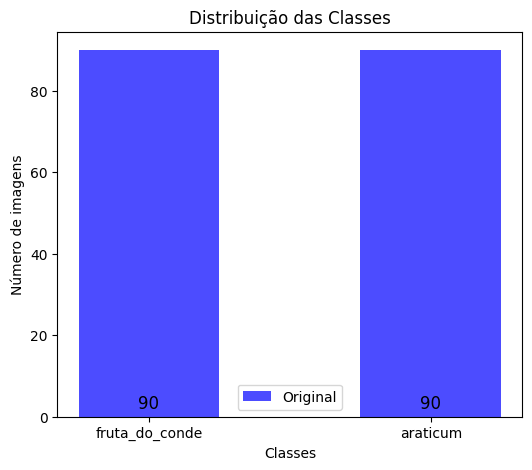


############################### 🔹 Download e Criação do Modelo Base ################################


################################ 🔹 Sumário Modelo Base MobileNetV2 #################################



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ entrada (InputLayer)                │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ sequential (Sequential)             │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_flip (RandomFlip)       │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_rotation                │ (None, 224, 224, 3)          │             0 │    -    │
│ (RandomRotation)                    │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_zoom (RandomZoom)       │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_contrast                │ (None, 224, 224, 3)          │             0 │    -    │
│ (RandomContrast)                    │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_translation             │ (None, 224, 224, 3)          │             0 │    -    │
│ (RandomTranslation)                 │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mobilenetv2_1.00_224 (Functional)   │ (None, 7, 7, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ input_layer (InputLayer)       │ (None, 224, 224, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ Conv1 (Conv2D)                 │ (None, 112, 112, 32)         │           864 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ bn_Conv1 (BatchNormalization)  │ (None, 112, 112, 32)         │           128 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ Conv1_relu (ReLU)              │ (None, 112, 112, 32)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ expanded_conv_depthwise        │ (None, 112, 112, 32)         │           288 │    N    │
│ (DepthwiseConv2D)                   │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ expanded_conv_depthwise_BN     │ (None, 112, 112, 32)         │           128 │    N    │
│ (BatchNormalization)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ expanded_conv_depthwise_relu   │ (None, 112, 112, 32)         │             0 │    -    │
│ (ReLU)                              │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ expanded_conv_project (Conv2D) │ (None, 112, 112, 16)         │           512 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ expanded_conv_pr

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


############################# 🔹 Treinamento do Modelo Base MobileNetV2 #############################


######################## 🔹 Iniciando treinamento com camadas congeladas... #########################

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4862 - loss: 1.0036
Epoch 1: val_loss improved from inf to 0.67033, saving model to /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning/modelos/melhor_modelo_MobileNetV2.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 650ms/step - accuracy: 0.4858 - loss: 0.9982 - val_accuracy: 0.6167 - val_loss: 0.6703 - learning_rate: 1.0000e-04
Epoch 2/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5323 - loss: 0.8239
Epoch 2: val_loss improved from 0.67033 to 0.63128, saving model to /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning/modelos/melhor_modelo_MobileNetV2.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.5342 - loss: 0.8280 - val_accuracy: 0.6500 - val_loss: 0.6313 - learni

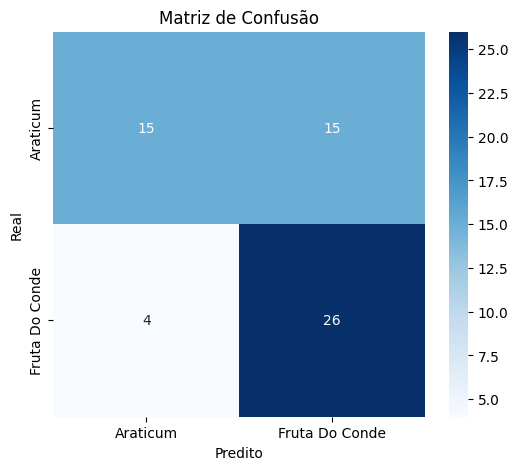



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

################################# 🔹 Plotar a Curva ROC MobileNetV2 #################################



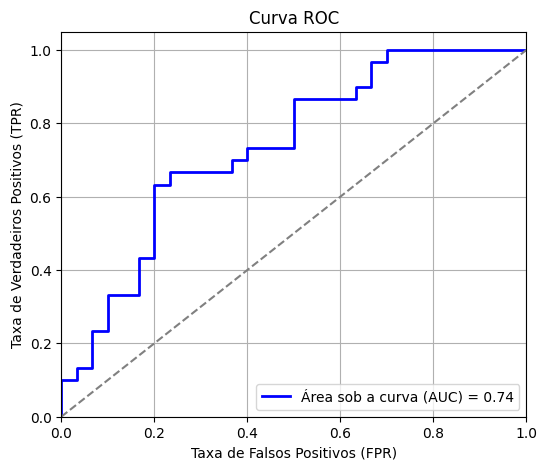


##################################### 🔹 Histórico MobileNetV2 ######################################



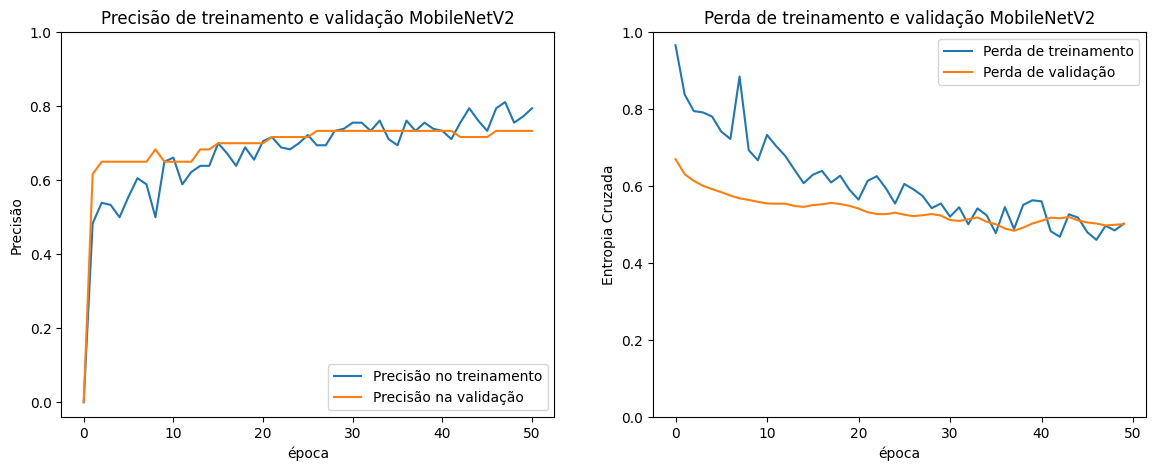

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

################################### 🔹 Probabilidade MobileNetV2 ####################################



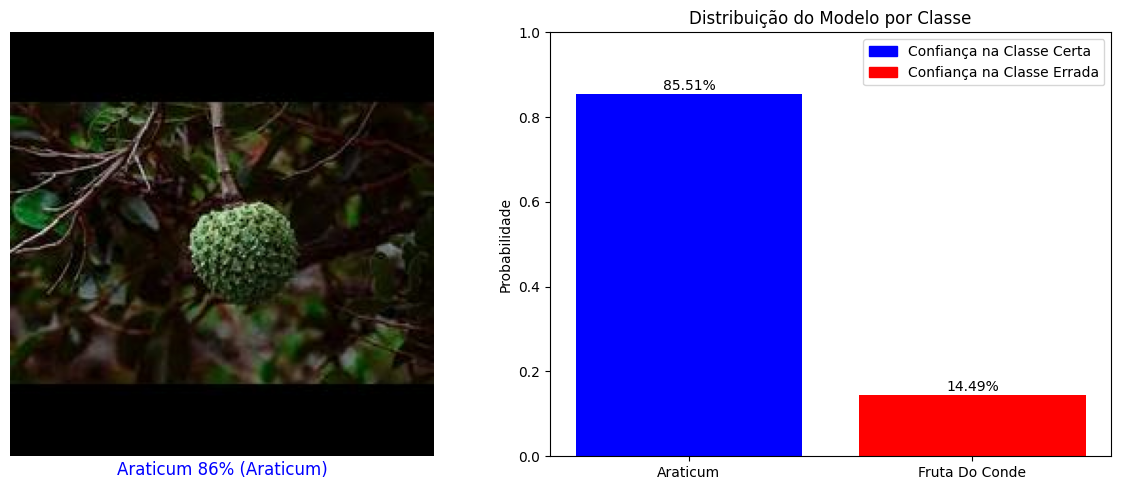

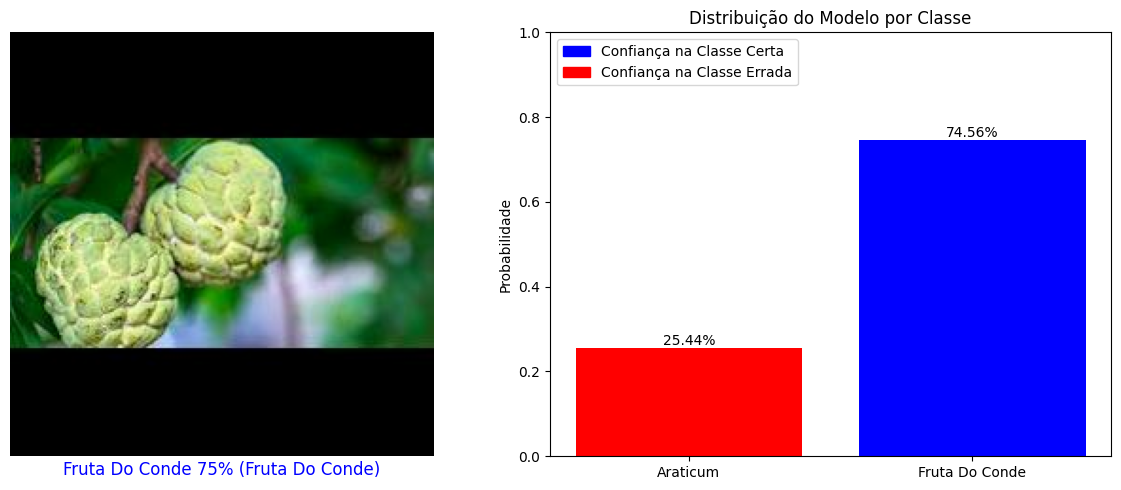


##################################################################################################################################


############################## 🔹 Iniciando Ajuste Fino MobileNetV2... ##############################

Epoch 50/149
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7440 - loss: 0.5757
Epoch 50: val_loss improved from inf to 0.46670, saving model to /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning/modelos/melhor_modelo_ajuste_fino.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 722ms/step - accuracy: 0.7465 - loss: 0.5720 - val_accuracy: 0.7333 - val_loss: 0.4667 - learning_rate: 1.0000e-05
Epoch 51/149
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7352 - loss: 0.4979
Epoch 51: val_loss improved from 0.46670 to 0.44976, saving model to /content/drive/MyDrive/DIO/Projeto_Transfer_Learning/01-transfer_learning/modelos/melhor_modelo_ajuste_fino.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.7325 - loss: 0.5002 - val_accurac

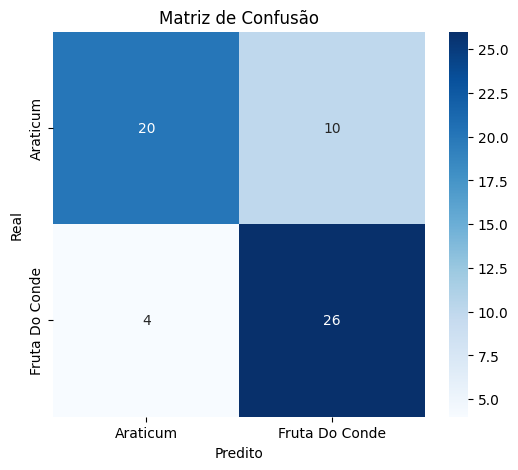



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

########################### 🔹 Plotar a Curva ROC Ajuste Fino MobileNetV2 ###########################



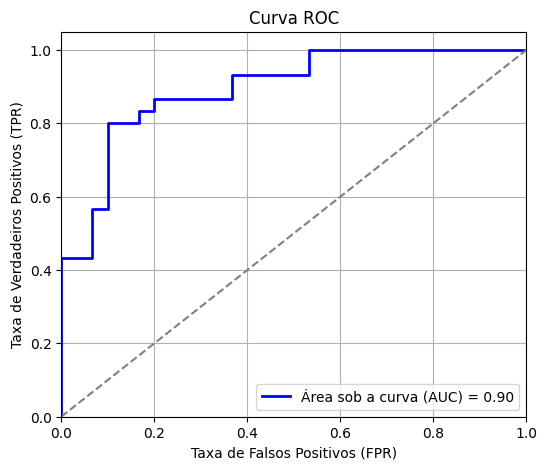


############################### 🔹 Histórico Ajuste Fino MobileNetV2 ################################



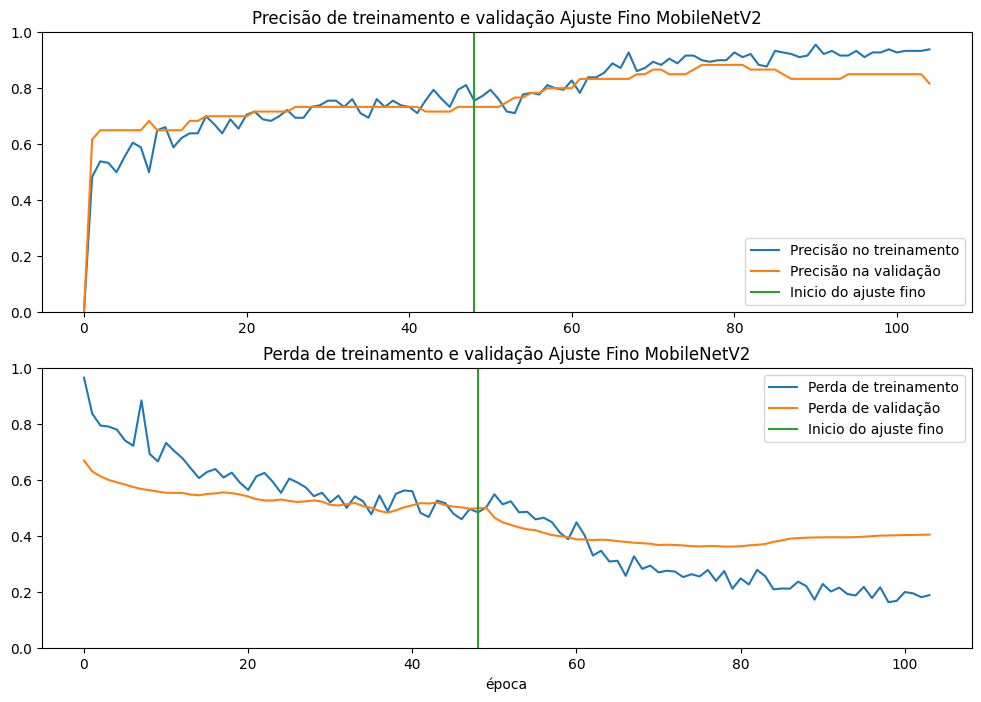

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

############################# 🔹 Probabilidade Ajuste Fino MobileNetV2 ##############################



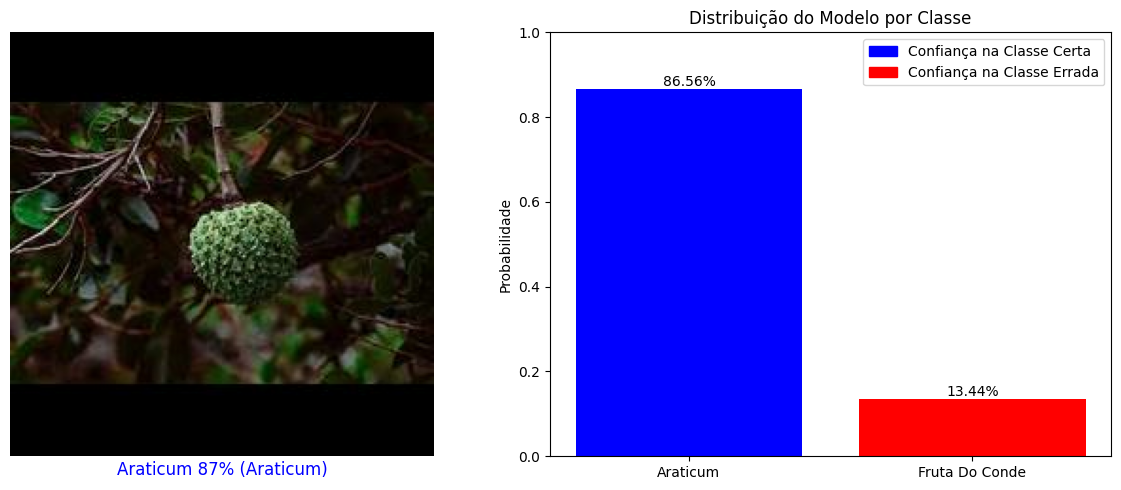

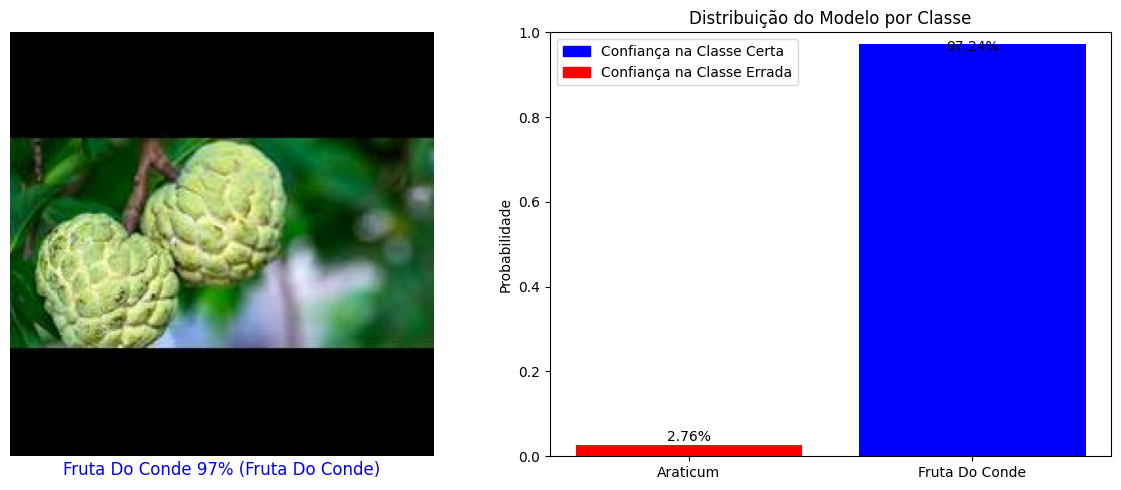


############################################ 🔹 FINAL ETAPA AJUSTE FINO MOBILENETV2 🔹 #############################################



In [ ]:
# importa as funções do arquivo main.py
import random
import main

from graficos import exibir_array_previsoes

In [ ]:
# Realiza a predição de 6 imagens aleatórias
# random.seed(0)
# idx = sorted(random.sample(range(60), 60))
# for idx in idx:
for idx in range(60):
    # print(idx)
    exibir_array_previsoes(idx, y_pred=main.predicoes, dataset_teste=main.dados_teste)
    print('\n')

<p>
<center>

# Kbô!!!  :)
---
</p>
</center>